In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('seattle-weather.csv')

### ANALYSING THE DATASET

There are 6 variables.
4 continuous variables.
1 variable to accomodate the date.
1 variable(dependent variable) refers to the weather.

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
data.shape

(1461, 6)

### Data Exploration

<AxesSubplot:xlabel='weather', ylabel='count'>

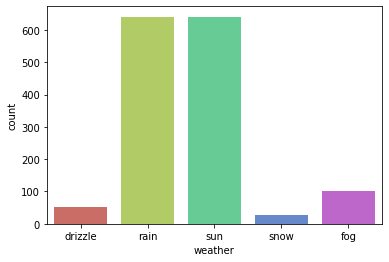

In [5]:
sns.countplot(x="weather", data=data, palette="hls")

From the above countplot, we can observe that the dataset contains higher amount of data with the Rain and Sun weather

In [6]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
count_rain = len(data[data.weather=="rain"])
count_sun = len(data[data.weather=="sun"])
count_drizzle = len(data[data.weather=="drizzle"])
count_snow = len(data[data.weather=="snow"])
count_fog = len(data[data.weather=="fog"])
print("Percent of Rain: {:2f}%".format((count_rain/len(data.weather))*100))
print("Percent of Sun: {:2f}%".format((count_sun/len(data.weather))*100))
print("Percent of Drizzle: {:2f}%".format((count_drizzle/len(data.weather))*100))
print("Percent of Snow: {:2f}%".format((count_snow/len(data.weather))*100))
print("Percent of Fog: {:2f}%".format((count_fog/len(data.weather))*100))

Percent of Rain: 43.874059%
Percent of Sun: 43.805613%
Percent of Drizzle: 3.627652%
Percent of Snow: 1.779603%
Percent of Fog: 6.913073%


### Distribution of Numerical values using Histogram 

<AxesSubplot:xlabel='wind', ylabel='Count'>

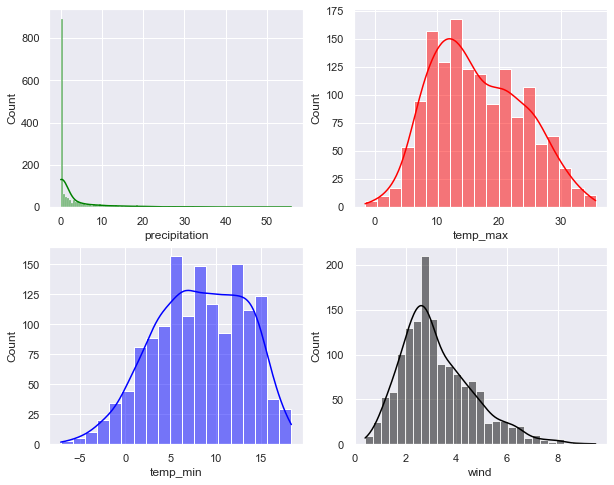

In [8]:
sns.set(style="darkgrid")
fig, axis = plt.subplots(2,2, figsize=(10,8))
sns.histplot(data=data, x="precipitation", kde=True, ax=axis[0,0], color='green')
sns.histplot(data=data, x="temp_max", kde=True, ax=axis[0,1], color='red')
sns.histplot(data=data, x="temp_min", kde=True, ax=axis[1,0], color='blue')
sns.histplot(data=data, x="wind", kde=True, ax=axis[1,1], color='black')

From the above distribution, it is clear that Precipitation and Wind are Positively Skewed.
And temp_min is Negatively Skewed and has some outliers.

<AxesSubplot:xlabel='wind'>

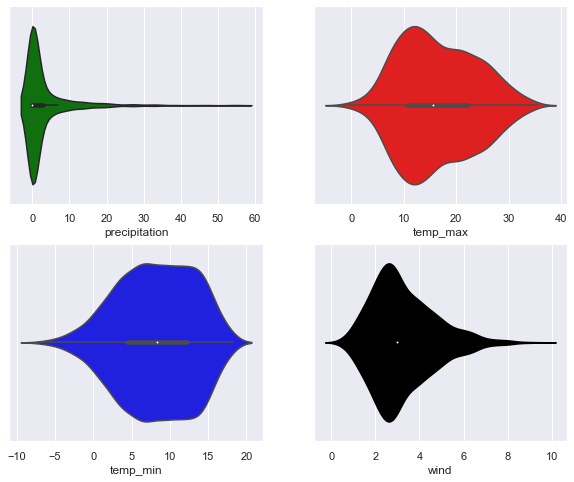

In [9]:
sns.set(style="darkgrid")
fig, axis = plt.subplots(2,2, figsize=(10,8))
sns.violinplot(x="precipitation", data=data, kde=True, ax=axis[0,0], color='green')
sns.violinplot(x="temp_max", data=data, kde=True, ax=axis[0,1], color='red')
sns.violinplot(data=data, x="temp_min", kde=True, ax=axis[1,0], color='blue')
sns.violinplot(data=data, x="wind", kde=True, ax=axis[1,1], color='black')

From the above Violin plot we can clearly understand the Skewness of the Data as the TAIL indicates the skewness.

<AxesSubplot:xlabel='precipitation', ylabel='weather'>

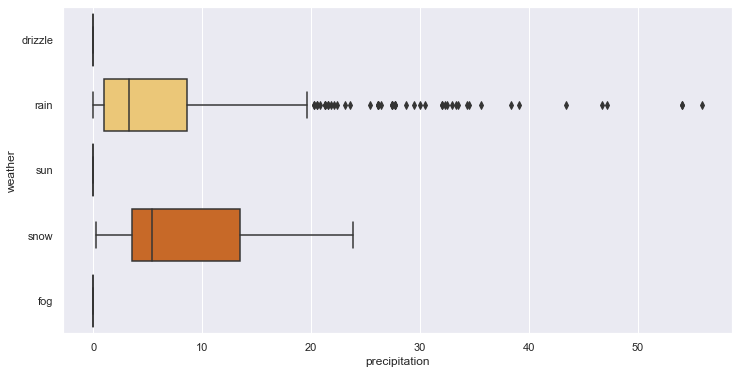

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x="precipitation", y="weather", data=data, palette="YlOrBr")

From above boxplot between weather and precipitation, we can observe that Rain has many positive outliers and both the rain and snow are positively skewed or has positive skewness.

<AxesSubplot:xlabel='temp_max', ylabel='weather'>

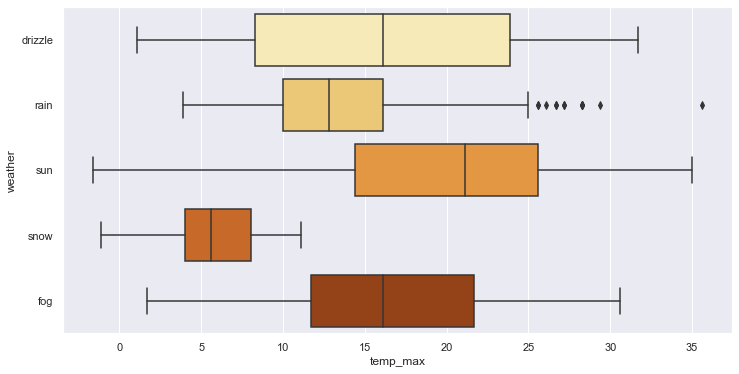

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_max", y="weather", data=data, palette="YlOrBr")

<AxesSubplot:xlabel='temp_min', ylabel='weather'>

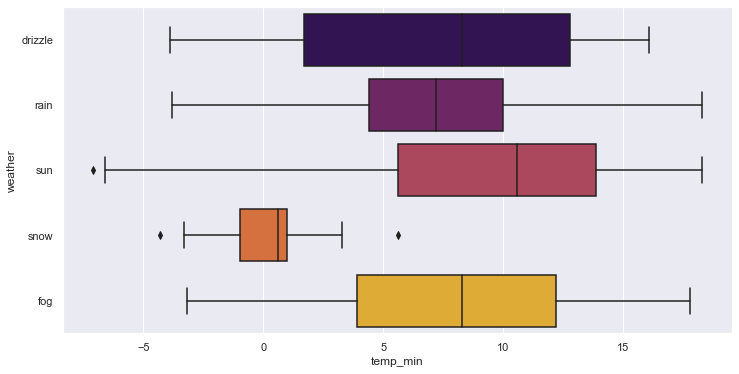

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x="temp_min", y="weather", data=data, palette="inferno")

Here, snow has both positive and negative outliers and sun has negative outliers. 

<AxesSubplot:xlabel='wind', ylabel='weather'>

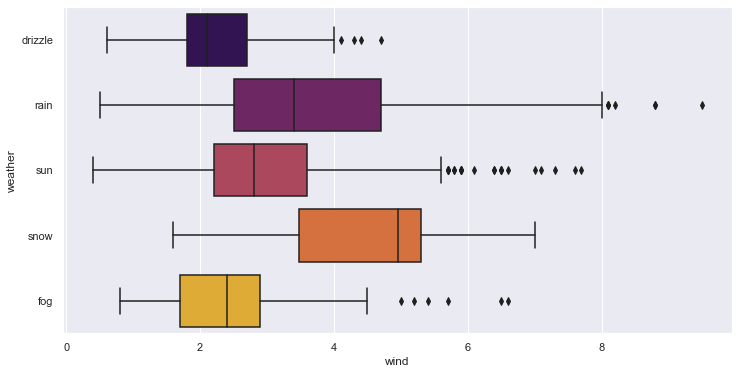

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x="wind", y="weather", data=data, palette="inferno")

Every attributes of weather has some positive outliers and skewness.

## Heatmap

<AxesSubplot:>

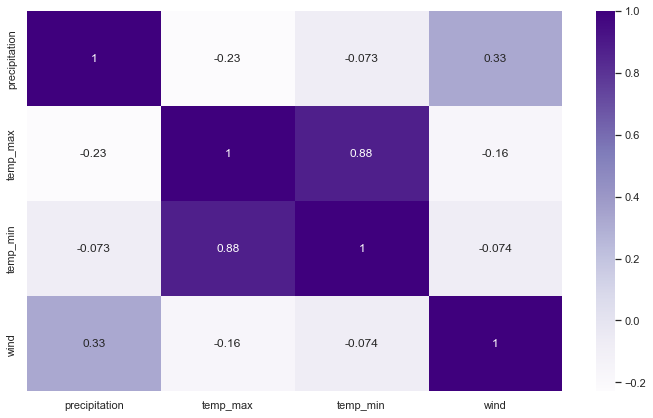

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True, cmap='Purples')

There is a high and positive correlation between temp_max and temp_min

Pearson correlation: -0.22855481643297043
T Test and P value: Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


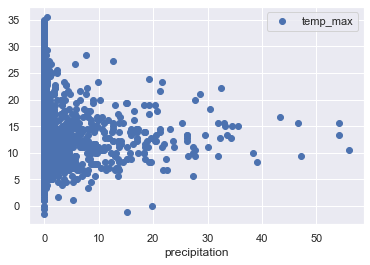

In [15]:
data.plot("precipitation", "temp_max", style='o')
print("Pearson correlation:", data["precipitation"].corr(data["temp_max"]))
print("T Test and P value:", stats.ttest_ind(data["precipitation"], data["temp_max"]))

Pearson correlation: -0.16485663487495483
T Test and P value: Ttest_indResult(statistic=-67.3601643301846, pvalue=0.0)


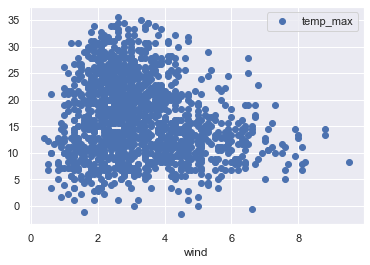

In [16]:
data.plot("wind", "temp_max", style='o')
print("Pearson correlation:", data["wind"].corr(data["temp_max"]))
print("T Test and P value:", stats.ttest_ind(data["wind"], data["temp_max"]))

In [17]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

### Data Preprocessing

In [18]:
# drop unnecessary variables
df = data.drop(["date"], axis=1)

In [19]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


#### Remove outliers 

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_9332\2181444243.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]


#### Skewed Distribution Treatment

In [21]:
df.precipitation = np.sqrt(df.precipitation)
df.wind = np.sqrt(df.wind)

<AxesSubplot:xlabel='wind', ylabel='Count'>

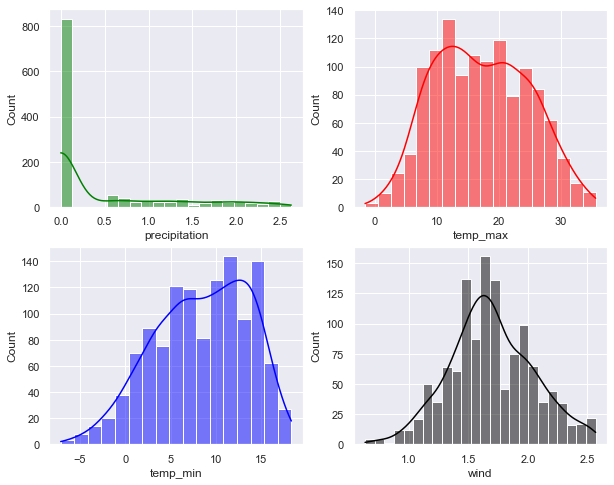

In [22]:
sns.set(style = "darkgrid")
fig, axis = plt.subplots(2,2, figsize=(10,8))
sns.histplot(data=df, x="precipitation", kde=True, ax=axis[0,0], color='green')
sns.histplot(data=df, x="temp_max", kde=True, ax=axis[0,1], color='red')
sns.histplot(data=df, x="temp_min", kde=True, ax=axis[1,0], color='blue')
sns.histplot(data=df, x="wind", kde=True, ax=axis[1,1], color='black')

In [23]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


#### Scaling the weather variables using label encoder

In [24]:
lc = LabelEncoder()
df["weather"] = lc.fit_transform(df["weather"])

In [25]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


In [26]:
x = df.drop(['weather'], axis=1).values
y = df["weather"].values

In [27]:
df.weather.unique()

array([0, 2, 4, 3, 1])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

### Algorithms and Model training

### KNN 

In [29]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print("KNN Accuracy:", knn.score(x_test, y_test))

KNN Accuracy: 0.7651821862348178


In [30]:
svm = SVC()
svm.fit(x_train, y_train)
print("SVM Accuracy:", svm.score(x_test, y_test))

SVM Accuracy: 0.7773279352226721


In [31]:
gbc = GradientBoostingClassifier(subsample=0.5, n_estimators=450, max_depth=5, max_leaf_nodes=25)
gbc.fit(x_train, y_train)
print("GBC Accuracy:", gbc.score(x_test, y_test))

GBC Accuracy: 0.7894736842105263


In [32]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
print("XGB Accuracy:", xgb.score(x_test, y_test))

XGB Accuracy: 0.8016194331983806


In [33]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=xgb.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain
